## Notebook to go through Woosters initial color shape data ##



In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from preprocess import *
from preprocess import _normalize_array

from analysis import *

from unpack import create_dir_structure

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Here we started with a previously packed nifti files. We got them all in one directory with some extra meta data files, so we need to organize them in a nice way. This isnt't strictly nessesary, since we can specify file locs however in all the funcitons, but standard organization is always good.

In [2]:
unpacked = '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster'
root_dir = '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape'


In [17]:
SOURCE = create_dir_structure(unpacked, root_dir)
print(SOURCE)

['/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210706090044/1', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210507130921/17', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210830083846/4', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210716114353/1', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210720080638/4', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210514130344/1', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210809082728/11', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210723115654/1', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210709121532/3', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210903122341/2', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/func

In [5]:
# Select a single day of data for debugging purposes 
day_dirs = sorted(os.listdir(os.path.join(root_dir, 'functional')))[-11:]
SOURCE = []
for day in day_dirs:
    day_dir = os.path.join(root_dir, 'functional', day)
    print(day_dir)
    SOURCE += [os.path.join(day_dir, f) for f in os.listdir(day_dir) if f.isnumeric()]
print(SOURCE)

/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210720080638
/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210723115654
/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210727082648
/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210730115311
/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210803080907
/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210806114003
/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210809082728
/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210827115825
/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210830083846
/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210903122341
/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210920090023
['/Users/loggiasr/Projects/fmri/

In [3]:
# manual SOURCE
SOURCE = ['/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210730115311/3', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210806114003/3', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210806114003/2', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210809082728/6', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210809082728/4', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210830083846/6', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210830083846/4', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210830083846/2', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210903122341/6', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210903122341/3', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210903122341/5', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210920090023/6']

In [9]:
SOURCE = check_time_series_length(SOURCE, 'f.nii.gz', 280)
print(len(SOURCE))

32


The first step is to correct the monkey position to sphinx. We'll
als create a new directory for this preprocessing and copy the files over

In [10]:
convert_to_sphinx(SOURCE, fname='f.nii.gz')

211014-13:31:22,103 nipype.interface INFO:
	 stdout 2021-10-14T13:31:22.103191:mri_convert --sphinx --out_type nii --input_volume /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210803080907/4/f.nii.gz --output_volume /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210803080907/4/f_sphinx.nii 
211014-13:31:22,106 nipype.interface INFO:
	 stdout 2021-10-14T13:31:22.104910:mri_convert --sphinx --out_type nii --input_volume /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210730115311/3/f.nii.gz --output_volume /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210730115311/3/f_sphinx.nii 
211014-13:31:22,104 nipype.interface INFO:
	 stdout 2021-10-14T13:31:22.104233:mri_convert --sphinx --out_type nii --input_volume /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210806114003/2/f.nii.gz --output_volume /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_s

211014-13:31:48,213 nipype.interface INFO:
	 stdout 2021-10-14T13:31:48.213414:reading from /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210803080907/5/f.nii.gz...
211014-13:31:48,208 nipype.interface INFO:
	 stdout 2021-10-14T13:31:48.169736:i_ras = (-1, -0, 0)
211014-13:31:48,227 nipype.interface INFO:
	 stdout 2021-10-14T13:31:48.213414:TR=3000.00, TE=0.00, TI=0.00, flip angle=0.00
211014-13:31:48,234 nipype.interface INFO:
	 stdout 2021-10-14T13:31:48.213414:i_ras = (-1, -0, 0)
211014-13:31:48,235 nipype.interface INFO:
	 stdout 2021-10-14T13:31:48.213414:j_ras = (0, 0, 1)
211014-13:31:48,235 nipype.interface INFO:
	 stdout 2021-10-14T13:31:48.213414:k_ras = (-0, -1, 0)
211014-13:31:48,230 nipype.interface INFO:
	 stdout 2021-10-14T13:31:48.169736:j_ras = (0, 0, 1)
211014-13:31:48,236 nipype.interface INFO:
	 stdout 2021-10-14T13:31:48.169736:k_ras = (-0, -1, 0)
211014-13:31:48,237 nipype.interface INFO:
	 stdout 2021-10-14T13:31:48.169736:Changing ori

211014-13:32:13,122 nipype.interface INFO:
	 stdout 2021-10-14T13:32:13.122250:reading from /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210920090023/7/f.nii.gz...
211014-13:32:13,122 nipype.interface INFO:
	 stdout 2021-10-14T13:32:13.122250:TR=3000.00, TE=0.00, TI=0.00, flip angle=0.00
211014-13:32:13,122 nipype.interface INFO:
	 stdout 2021-10-14T13:32:13.122250:i_ras = (-1, -0, 0)
211014-13:32:13,122 nipype.interface INFO:
	 stdout 2021-10-14T13:32:13.122250:j_ras = (0, 0, 1)
211014-13:32:13,122 nipype.interface INFO:
	 stdout 2021-10-14T13:32:13.122250:k_ras = (-0, -1, 0)
211014-13:32:13,122 nipype.interface INFO:
	 stdout 2021-10-14T13:32:13.122250:Changing orientation information to Sphinx
211014-13:32:13,122 nipype.interface INFO:
	 stdout 2021-10-14T13:32:13.122250:writing to /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210920090023/7/f_sphinx.nii...
211014-13:32:13,389 nipype.interface INFO:
	 stdout 2021-10-14T13:32

Run FSL Motion Correction

/Users/loggiasr/Projects/fmri/monkey_fmri/preprocess.py:197: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210730115311/3', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210806114003/3', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210806114003/2', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210809082728/6', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210809082728/4', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210830083846/6', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210830083846/4', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210830083846/2', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210903122341/6', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functional/20210903122341/3', '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/functi

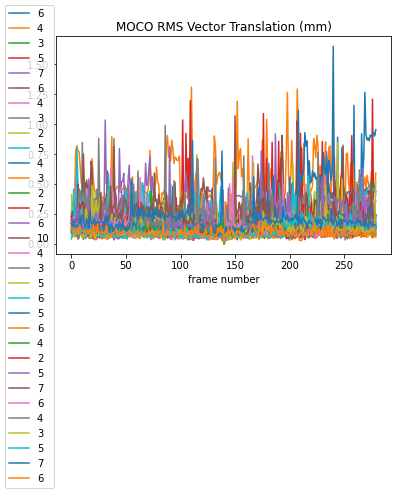

In [11]:
SOURCE = motion_correction(SOURCE, fname='f_sphinx.nii', check_rms=True, var_threshold=.15, abs_threshold=.6)
print(SOURCE)

In [12]:
# pad the funcitonal data 
print(len(SOURCE))
functional_to_cube(SOURCE, fname='moco.nii.gz')

12
128
128
128
128
128
128
128
128
128
128
128
128


Now we will downsample our high resolution anatomical for the use in registration. Working with the full size scan is computationally intensive for no reason, and can actually reduce registration accuracy. 

In [36]:
# center_nifti(source_dir=os.path.join(root, 'mri'), fname='orig.mgz')
create_low_res_anatomical(source_dir=os.path.join(root_dir, 'mri'), fname='orig.nii')

mri_convert /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/mri/orig.nii -vs 3 3 3 /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/mri/low_res.nii 
reading from /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/mri/orig.nii...
TR=2550.00, TE=0.00, TI=0.00, flip angle=0.00
i_ras = (-1, 0, 0)
j_ras = (0, 0, -1)
k_ras = (0, 1, 0)
Reslicing using trilinear interpolation 
writing to /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/mri/low_res.nii...
mri_convert /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/mri/low_res.nii -iis 1 -ijs 1 -iks 1 /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/mri/low_res.nii 
reading from /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/mri/low_res.nii...
TR=2550.00, TE=0.00, TI=0.00, flip angle=0.00
i_ras = (-1, 0, 0)
j_ras = (0, 0, -1)
k_ras = (0, 1, 0)
writing to /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/mri/low_res.nii...


Skull Strip the functional and anatomical data. This is done before registration to avoid weird skull artifacts in the
functional from effecting the registration optimization process.

In [37]:
# SOURCE = SOURCE[:16]

In [13]:
ana_dir = os.path.join(root_dir, 'mri')
skull_strip(SOURCE, fname='f_cubed.nii', is_time_series=True, fractional_thresh=.65)

Now we will register the functional data to a detailed anatomical scan.

This is accomplished by first minimizing the mutual information between the funciton and anatomical scan via only linear
 transforms (rotation, sheer, translation, dilation)

Next the functional and anatomical data are projected into a high dimensional space using a kernel function (default
kernel is radial basis) and mutual information is minimized via linear transforms with respect to the kernel space. This
results in fine grain deformations to the functional data to better match the anatomical structures.


In [14]:
ana_dir = os.path.join(root_dir, 'mri')
linear_affine_registration(functional_input_dirs=SOURCE, fname='stripped.nii.gz',
                           template_file=os.path.join(ana_dir, 'low_res.nii'))
nonlinear_registration(functional_input_dirs=SOURCE, source_fname='stripped.nii.gz',
                       template_file=os.path.join(ana_dir, 'low_res.nii'),
                       transform_input_dir=SOURCE, affine_fname='stripped_flirt.mat', )


211014-13:41:59,331 nipype.interface INFO:
	 stderr 2021-10-14T13:41:59.326884:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211014-13:41:59,338 nipype.interface INFO:
	 stderr 2021-10-14T13:41:59.338084:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211014-13:41:59,413 nipype.interface INFO:
	 stderr 2021-10-14T13:41:59.413458:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211014-13:41:59,416 nipype.interface INFO:
	 stderr 2021-10-14T13:41:59.414965:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be trunc

211014-13:42:44,498 nipype.interface INFO:
	 stderr 2021-10-14T13:42:44.420871:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211014-13:42:44,515 nipype.interface INFO:
	 stderr 2021-10-14T13:42:44.501093:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211014-13:42:44,773 nipype.interface INFO:
	 stderr 2021-10-14T13:42:44.766611:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211014-13:42:44,772 nipype.interface INFO:
	 stderr 2021-10-14T13:42:44.717335:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be trunc

Nonlinear registration will have generated a file of warp-coefficients that describe both the affine linear tranformation
and the nonlinear local warps to the functional data. In order to apply this to the 4d time-series, we must use
preform_nifti_registration, which wraps FSL.ApplyWarp. We pass the template anatomical again so we can preform a sanity
check between the produced registered functional nifti and the anatomical.

In [15]:
preform_nifti_registration(functional_input_dirs=SOURCE, transform_input_dir=SOURCE, template_file=os.path.join(ana_dir, 'low_res.nii'),
                           source_fname='stripped.nii.gz', transform_fname='reg_tensor.nii.gz')

Let's Confirm the registration by visualizing it on top of the anatomical:

/var/folders/89/dd1svxwn3f942px6dg4v1twx15nm77/T/ipykernel_52736/1882994868.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


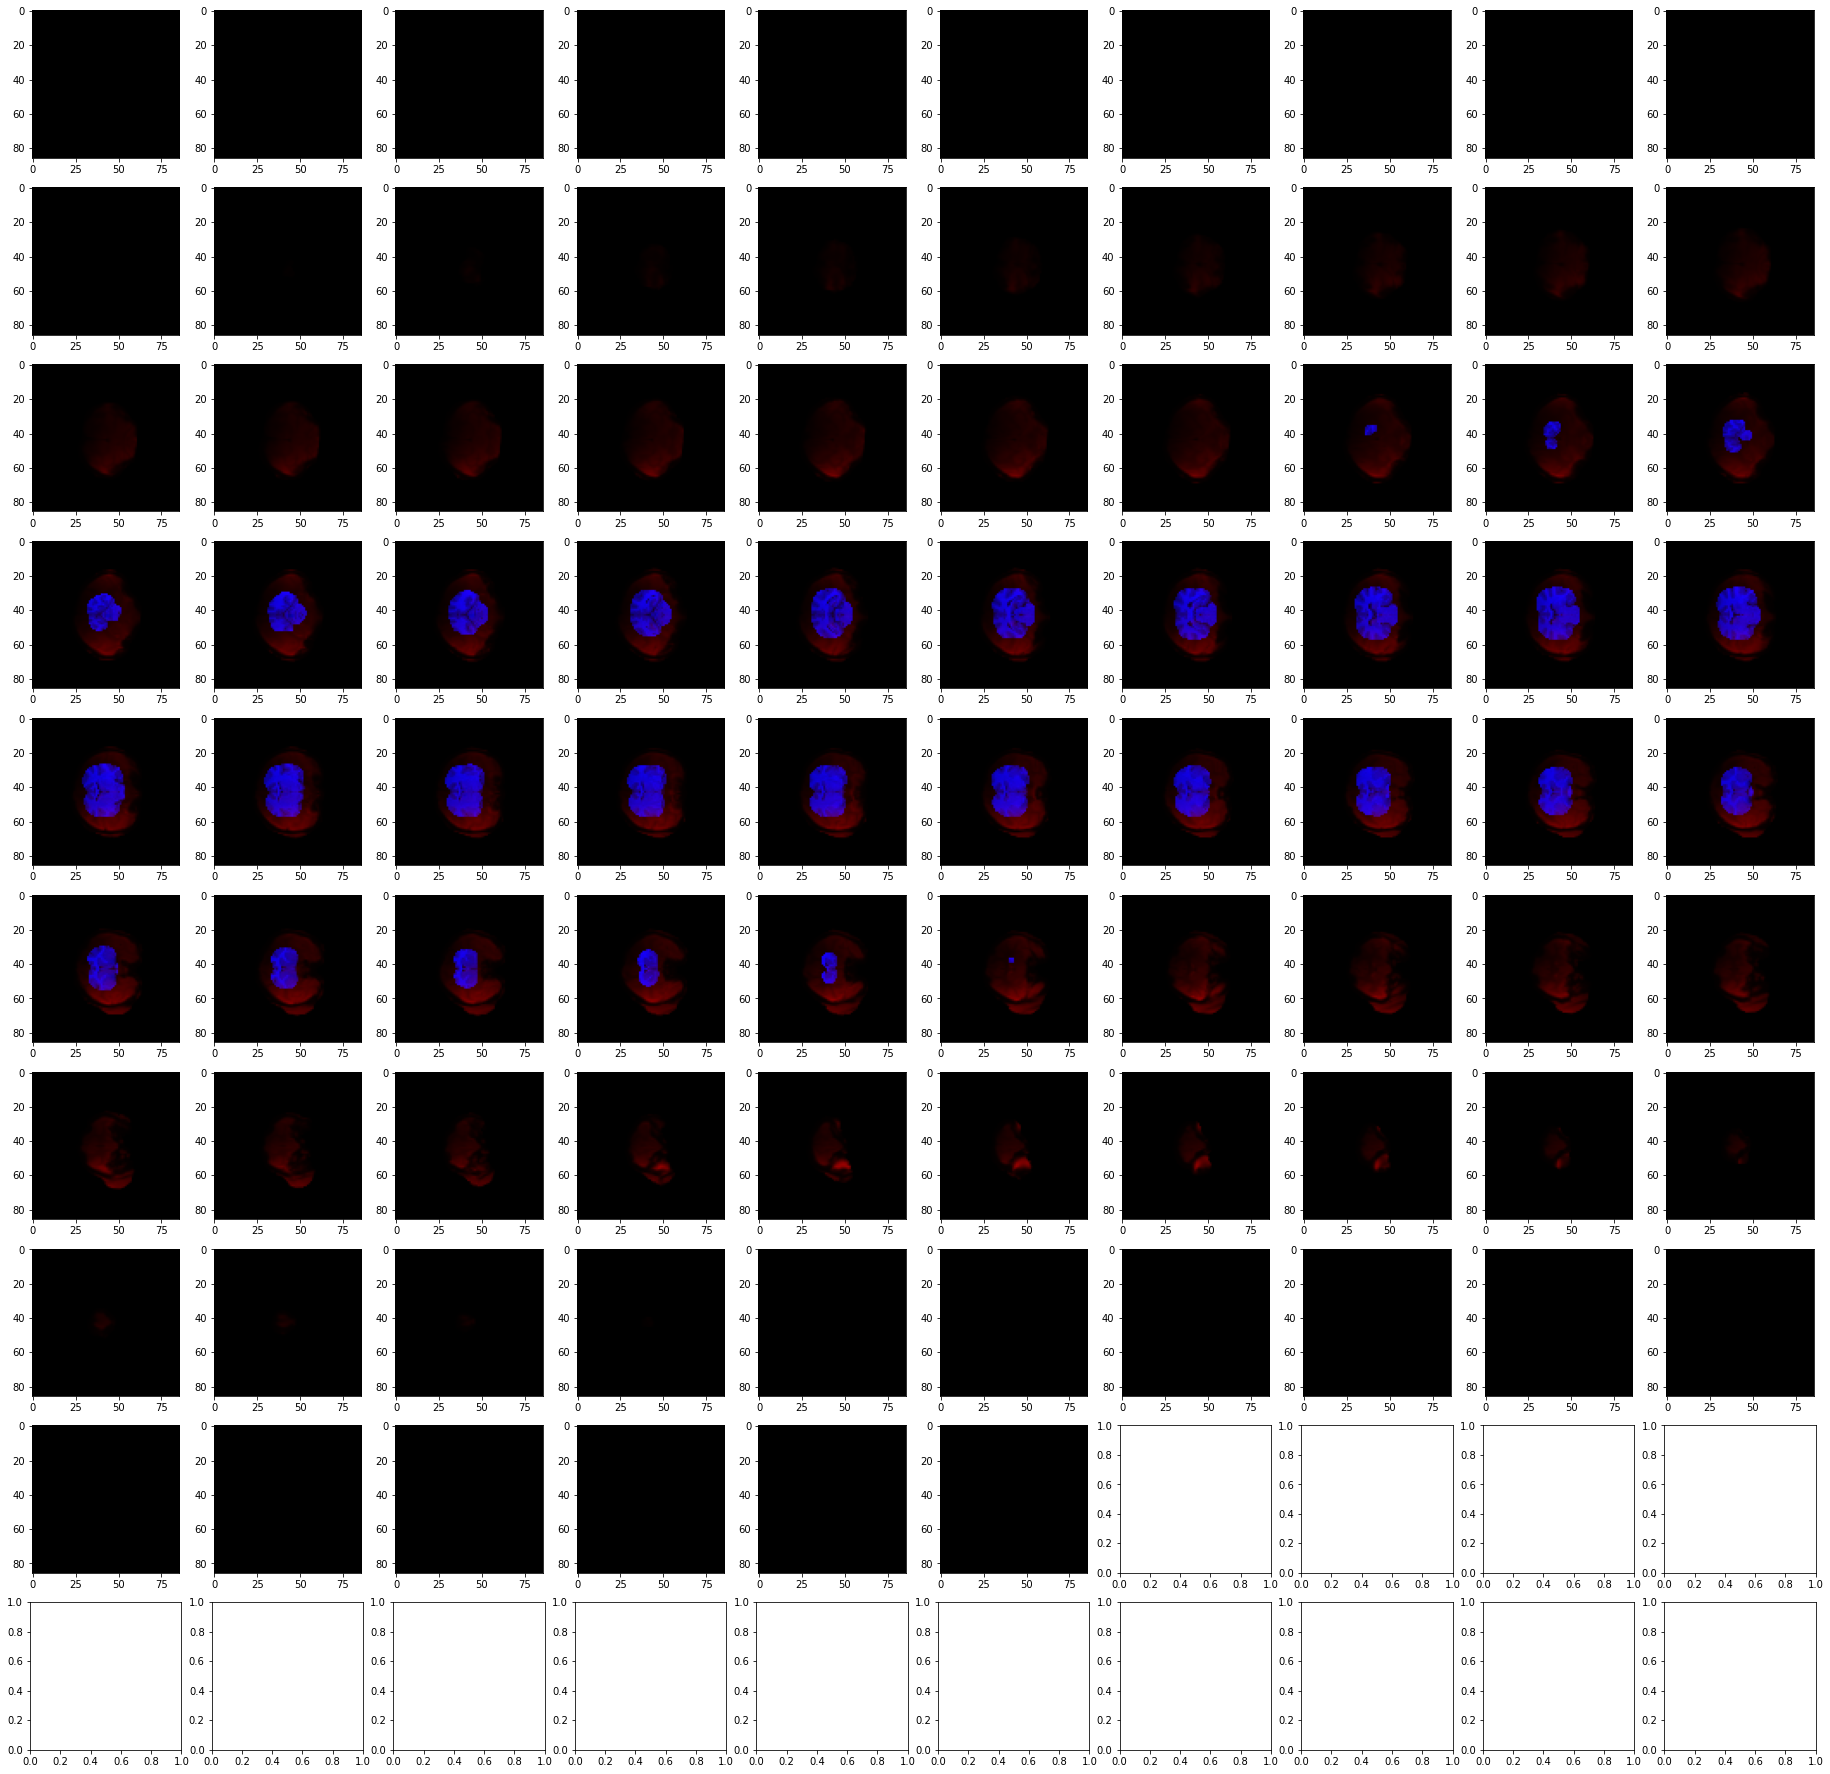

In [9]:
import nibabel as nib
func_nii = nib.load(os.path.join(SOURCE[0], 'registered.nii.gz'))
func_data = np.array(func_nii.get_fdata())
func_data = np.mean(func_data, axis=3) # average across time
num_plots = int(np.ceil(np.sqrt(func_data.shape[2])))

func_data = np.stack([func_data, np.zeros(func_data.shape), np.zeros(func_data.shape)], axis=3) # make red
anat_data = nib.load(os.path.join(ana_dir, 'stripped.nii.gz'))
anat_data = np.array(anat_data.get_fdata())
anat_data = np.stack([np.zeros(anat_data.shape), np.zeros(anat_data.shape), anat_data], axis=3) # make blue

overlay = _normalize_array(func_data) * .5 + _normalize_array(anat_data)
overlay = (overlay / max(overlay.flatten()))
fig, ax = plt.subplots(num_plots, num_plots, figsize=(32, 32))
for i in range(num_plots):
    for j in range(num_plots):
        try:
            ax[i, j].imshow(overlay[:, :, i*num_plots + j])
        except IndexError:
            continue
fig.show()

Normalize the functional data:

In [4]:
normalize(SOURCE, output=None, fname='registered.nii.gz', drift_correction=False)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  86  86  86 280   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  3.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.5:9e026117'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.70710677
quatern_d       : -0.70710677
qoffset_x       : 44.993347
qoffset_y       : -30.030266
qoffset_z       : 71.

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  86  86  86 280   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  3.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.5:9e026117'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.70710677
quatern_d       : -0.70710677
qoffset_x       : 44.993347
qoffset_y       : -30.030266
qoffset_z       : 71.

Begin Analysis 

In [8]:
# 0: Gray,
# 1: ChBW
# 2: ChC
# 3: Ach
# 4: C
    
desired_contrast_mat = np.array([[0, -1, 1, 0, 0],
                                [0, -1, 0, 1, 0],
                                [0, -1, 0, 0, 1],
                                [0, 0, -1, 1, 0], 
                                [0, 0, -1, 0, 1],
                                [0, 0, 0, -1, 1]]).T
contrast_desc = ['ChBW_vs_ChC', 'ChBW_vs_Ach', 'ChBW_vs_C', 'ChC_vs_Ach', 'ChC_vs_C', 'Ach_vs_C']
res = intra_subject_contrast(run_dirs=SOURCE, 
                             paradigm_file=os.path.join(root_dir, 'stimuli/Shape_color_paradigm2.para'), 
                             contrast_matrix=desired_contrast_mat, 
                             contrast_descriptors=contrast_desc, 
                             output_dir=os.path.join(root_dir, 'analysis_out'),
                             fname='normalized.nii',)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel

In [18]:
surf_dir = os.path.join(root_dir, 'surf')
ana_dir = os.path.join(root_dir, 'mri')

create_contrast_surface(anatomical_white_surface=os.path.join(surf_dir, 'rh.white'),
                        contrast_vol_path=os.path.join(root_dir, 'analysis_out/condition_ChBW_vs_ChC_contrast.nii'),
                        orig_low_res_anatomical=os.path.join(ana_dir, 'low_res.nii'),
                        orig_high_res_anatomical=os.path.join(ana_dir, 'orig.nii'),
                        hemi='rh', subject_id='wooster_color_shape')

mri_convert /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/analysis_out/tmp.nii -vs 0.3359375 0.3359375 0.3359375 /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/analysis_out/tmp.nii 
reading from /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/analysis_out/tmp.nii...
TR=1000.00, TE=0.00, TI=0.00, flip angle=0.00
i_ras = (-1, 0, 0)
j_ras = (0, 0, -1)
k_ras = (0, 1, 0)
Reslicing using trilinear interpolation 
writing to /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/analysis_out/tmp.nii...
mri_convert /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/analysis_out/tmp.nii -iis 1 -ijs 1 -iks 1 /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/analysis_out/tmp.nii 
reading from /Users/loggiasr/Projects/fmri/monkey_fmri/wooster_color_shape/analysis_out/tmp.nii...
TR=1000.00, TE=0.00, TI=0.00, flip angle=0.00
i_ras = (-1, 0, 0)
j_ras = (0, 0, -1)
k_ras = (0, 1, 0)
writing to /Users/loggiasr/Projects/fmri/monkey